# Gradient and Jacobian Visualizer

This notebook introduces key multivariate calculus tools used in machine learning and optimization. These concepts form the basis for optimization algorithms and backpropagation in deep learning:
- Gradients of scalar-valued functions
- Jacobians of vector-valued functions
- Visual intuition through plots and vector fields

## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


## Gradients

For $f : \mathbb{R}^n \rightarrow \mathbb{R}$, the gradient is:

$$
\nabla f(x) = \begin{bmatrix}  
\frac{\partial f}{\partial x_1} \\
\vdots \\
\frac{\partial f}{\partial x_n}
\end{bmatrix}
$$

It points in the direction of the steepest ascent.

### Quadratic Bowl Example

Let's start with the function:

$$f(x, y) = x^2 + y^2$$

The gradient is the following:

$$
\nabla f(x, y) = 
\begin{bmatrix} 
\frac{\partial f}{\partial x} \\[6pt]
\frac{\partial f}{\partial y} 
\end{bmatrix} = 
\begin{bmatrix} 2x \\ 2y \end{bmatrix}
$$

Let's visualize the gradient using a grid of points within $[-2, 2] \times [-2, 2]$, plot the contour lines of $f(x, y)$, and overlay the gradient vectors.

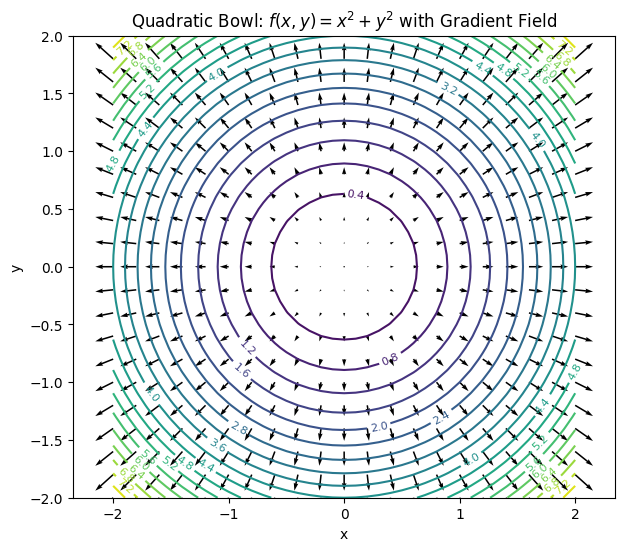

In [ ]:
def f(x, y):
    return x**2 + y**2

def grad_f(x, y):
    return 2 * x, 2 * y

x = np.linspace(-2, 2, 41)
y = np.linspace(-2, 2, 41)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

Gx, Gy = grad_f(X, Y)

# Plot contours
plt.figure(figsize=(7, 6))
CS = plt.contour(X, Y, Z, levels=20)
plt.clabel(CS, inline=True, fontsize=8)

# Plot gradient vectors
plt.quiver(X[::2, ::2], Y[::2, ::2], Gx[::2, ::2], Gy[::2, ::2], angles="xy")

plt.title("Quadratic Bowl: $f(x, y) = x^2 + y^2$ with Gradient Field")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.show()

### Nonlinear Example

Now let's consider:

$$f(x, y) = sin(xy)$$

The gradient is the following:

$$\nabla f(x, y) = 
\begin{bmatrix} 
\frac{\partial f}{\partial x} \\[6pt]
\frac{\partial f}{\partial y} 
\end{bmatrix} = 
\begin{bmatrix}
y \cdot cos(xy) \\
x \cdot cos(xy)
\end{bmatrix}
$$

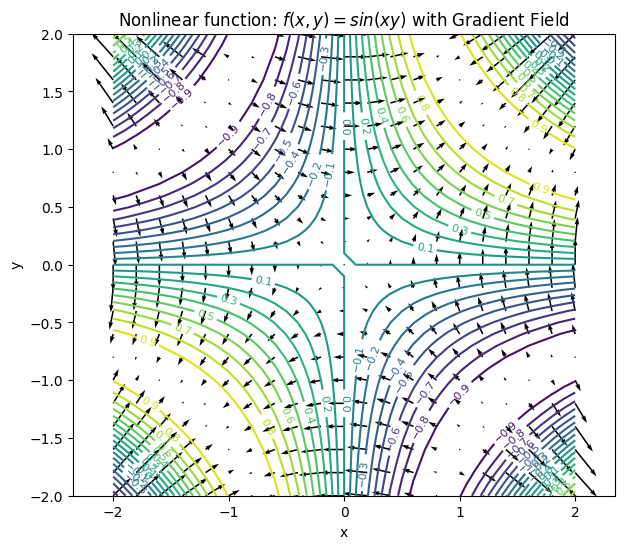

In [4]:
def f(x, y):
    return np.sin(x * y)

def grad_f(x, y):
    return y * np.cos(x * y), x * np.cos(x * y)

x = np.linspace(-2, 2, 41)
y = np.linspace(-2, 2, 41)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

Gx, Gy = grad_f(X, Y)

# Plot contours
plt.figure(figsize=(7, 6))
CS = plt.contour(X, Y, Z, levels=20)
plt.clabel(CS, inline=True, fontsize=8)

# Plot gradient vectors
plt.quiver(X[::2, ::2], Y[::2, ::2], Gx[::2, ::2], Gy[::2, ::2], angles="xy")

plt.title("Nonlinear function: $f(x, y) = sin(xy)$ with Gradient Field")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.show()

### Numerical Gradient Check

We can approximate each partial derivative using finite differences. Meaning that for a small step $h$, e.g. $10^{-5}$, we estimate:

$$
\frac{\partial f}{\partial x}(x, y) \approx \frac{f(x + h, y) - f(x - h, y)}{2h}
$$

$$
\frac{\partial f}{\partial y}(x, y) \approx \frac{f(x, y + h) - f(x, y - h)}{2h}
$$

In [9]:
def numerical_grad(f, x, y, h=1e-5):
    df_dx = (f(x + h, y) - f(x - h, y)) / (2 * h)
    df_dy = (f(x, y + h) - f(x, y - h)) / (2 * h)
    return df_dx, df_dy

f = lambda x, y: x**2 + y**2
grad_f = lambda x, y: (2 * x, 2 * y)
print("Quad Bowl")
for x, y in [(0, 0), (1, 2), (-1, -1), (0.5, -1.5)]:
    print(f"({x}, {y}) analytical:", grad_f(x, y))
    print(f"({x}, {y}) numerical:", numerical_grad(f, x, y))

print("\n==\n")

f = lambda x, y: np.sin(x * y)
grad_f = lambda x, y: (y * np.cos(x * y), x * np.cos(x * y))
print("Nonlinear")
for x, y in [(0, 0), (1, 2), (-1, -1), (0.5, -1.5)]:
    print(f"({x}, {y}) analytical:", grad_f(x, y))
    print(f"({x}, {y}) numerical:", numerical_grad(f, x, y))

Quad Bowl
(0, 0) analytical: (0, 0)
(0, 0) numerical: (0.0, 0.0)
(1, 2) analytical: (2, 4)
(1, 2) numerical: (2.0000000000131024, 4.000000000026205)
(-1, -1) analytical: (-2, -2)
(-1, -1) numerical: (-2.000000000002, -2.000000000002)
(0.5, -1.5) analytical: (1.0, -3.0)
(0.5, -1.5) numerical: (1.0000000000065512, -3.000000000019653)

==

Nonlinear
(0, 0) analytical: (np.float64(0.0), np.float64(0.0))
(0, 0) numerical: (np.float64(0.0), np.float64(0.0))
(1, 2) analytical: (np.float64(-0.8322936730942848), np.float64(-0.4161468365471424))
(1, 2) numerical: (np.float64(-0.8322936730364993), np.float64(-0.4161468365404541))
(-1, -1) analytical: (np.float64(-0.5403023058681398), np.float64(-0.5403023058681398))
(-1, -1) numerical: (np.float64(-0.5403023058569989), np.float64(-0.5403023058569989))
(0.5, -1.5) analytical: (np.float64(-1.0975333033107313), np.float64(0.36584443443691045))
(0.5, -1.5) numerical: (np.float64(-1.0975333032625656), np.float64(0.3658444344356581))


## Jacobians

The Jacobian is the generalization of a derivative when the function's output is a vector. 

- If $f : \mathbb{R}^n \rightarrow \mathbb{R}$, the derivative is a gradient vector
- If $f : \mathbb{R}^n \rightarrow \mathbb{R}^m$, the derivative is a Jacobian matrix
- The derivative of $f(x, y) = x^2 + y^2$ is a gradient vector
- The derivative of $f(x, y) = [x^2, xy, e^y]^T$ is a Jacobian matrix

When a function has multiple outputs, each output can change differently with respect to each input. The Jacobian is the matrix that organizes the partial derivatives. For a function $f : \mathbb{R}^n \rightarrow \mathbb{R}^m$, the Jacobian of $f$ is:

$$
J_f(x) = 
\begin{bmatrix}
\frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} & \cdots & \frac{\partial f_1}{\partial x_n} \\[6pt]
\frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2} & \cdots & \frac{\partial f_2}{\partial x_n} \\[6pt]
\vdots & \vdots & \ddots & \vdots \\[6pt]
\frac{\partial f_m}{\partial x_1} & \frac{\partial f_m}{\partial x_2} & \cdots & \frac{\partial f_m}{\partial x_n}
\end{bmatrix}
$$

### Nonlinear Example

Let's consider the nonlinear function:

$$
f(x, y) =
\begin{bmatrix}
x^2 \\
xy \\
e^y
\end{bmatrix}
$$

The Jacobian is the following:

$$
J_f(x, y) =
\begin{bmatrix}
2x & 0 \\
y & x \\
0 & e^y
\end{bmatrix}
$$